# Baby Names

*  Giulia MANNAIOLI
*  Lais Isabelle ALVES DOS SANTOS
*  Pedro ANDRADE FERREIRA SOBRINHO
*  Rafael SENNA BENATTI


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = '/content/drive/MyDrive/IGRMiniProject/baby_names_visualization/'

### Import libraries

In [1]:
import altair as alt
import pandas as pd
from IPython.display import Image

alt.data_transformers.enable('json') # work-around to let Altair handle larger data sets

DataTransformerRegistry.enable('json')

### Data Loading

In [7]:
# Reference to data
baby_names = pd.read_csv(path + 'dpt2020.csv',  sep=';')
baby_names

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3727548,2,ZYA,2018,59,3
3727549,2,ZYA,XXXX,XX,264
3727550,2,ZYNA,2013,93,3
3727551,2,ZYNA,XXXX,XX,59


### Visualization 1

How do baby names evolve over time? Are there names that have consistently remained popular or unpopular? Are there some that have were suddenly or briefly popular or unpopular? Are there trends in time?

#### Sketches

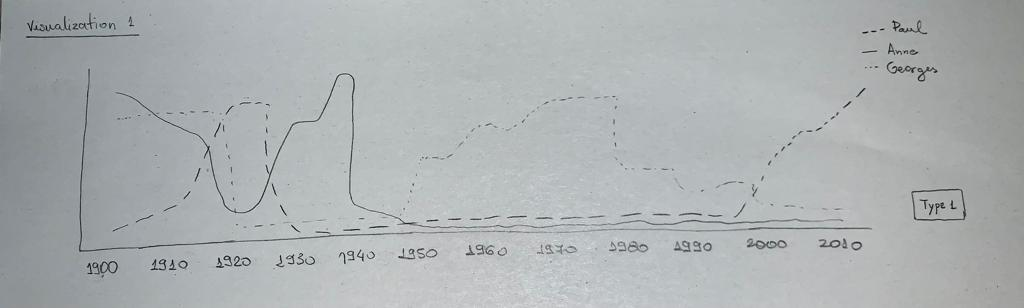

In [16]:
Image(filename=path +"./images/vis1_im1.jpeg")

With this first visualization, it is possible to notice the following strengh points:
-  visualization of the evolution over time of each name present in the data set
-  comparison between names over time. For instance, see the most common names in a certain year or range
-  continuos distribution over time, there is no bins

As for weak points:
-  the data is clustered for all names at the same time, which may cause some difficulty to read the data if there is not a sort of filter, for example

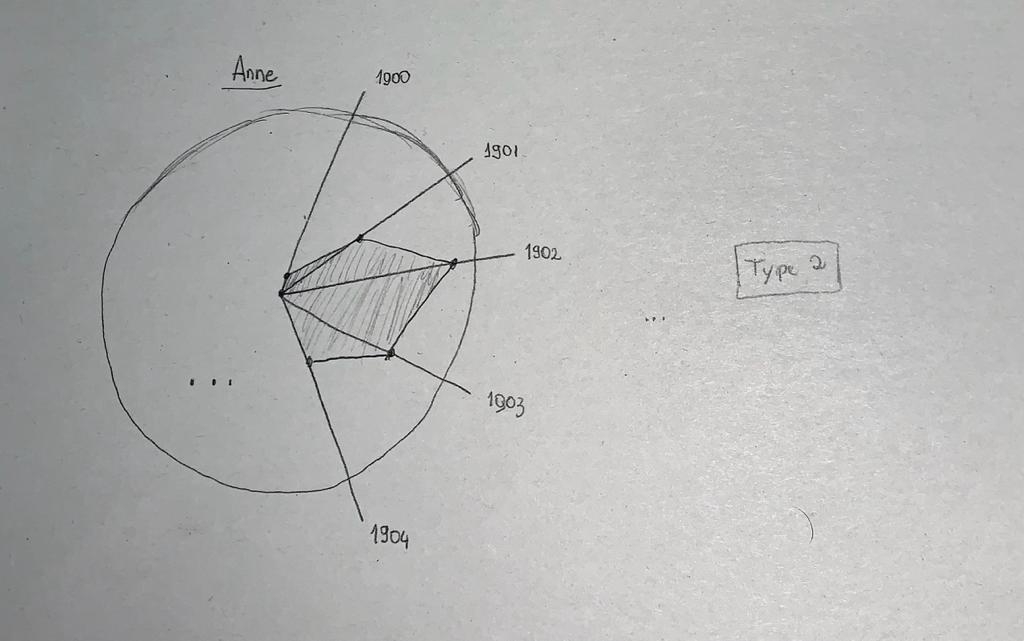

In [13]:
Image(filename=path + "./images/vis1_im2.jpeg")

The radar chart is interesting, because:
- it is easy to visualize if there are variables with similar values or if there is some outliers. For example, how it the name "Anne" in 1902 and in 1903? With this chart, it is quite easy to see
- plotting different names allow a clear comparison over time

However,
- it may have some overclusttering. Having the years for each name from 1900 to 2019 may have a lot of data and might not be instantaneously readable.

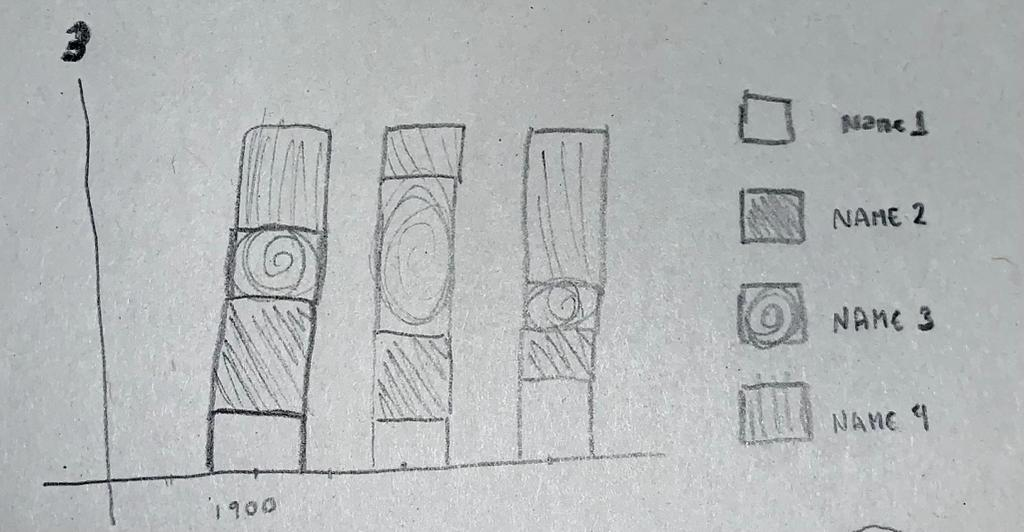

In [14]:
Image(filename=path +"./images/vis1_im3.jpeg")

As for the third visualization, a sort of Nightingale rose chart, with a different representation containing the same idea. Its strong points are:
- easy to see the "quantification" of the name over the years
- see popular and unpopular data

For weak points:
- outliers may have a lot of highlight if they are big, for example

#### Implementation

### Visualization 2

Is there a regional effect in the data? Are some names more popular in some regions? Are popular names generally popular across the whole country?

#### Sketches

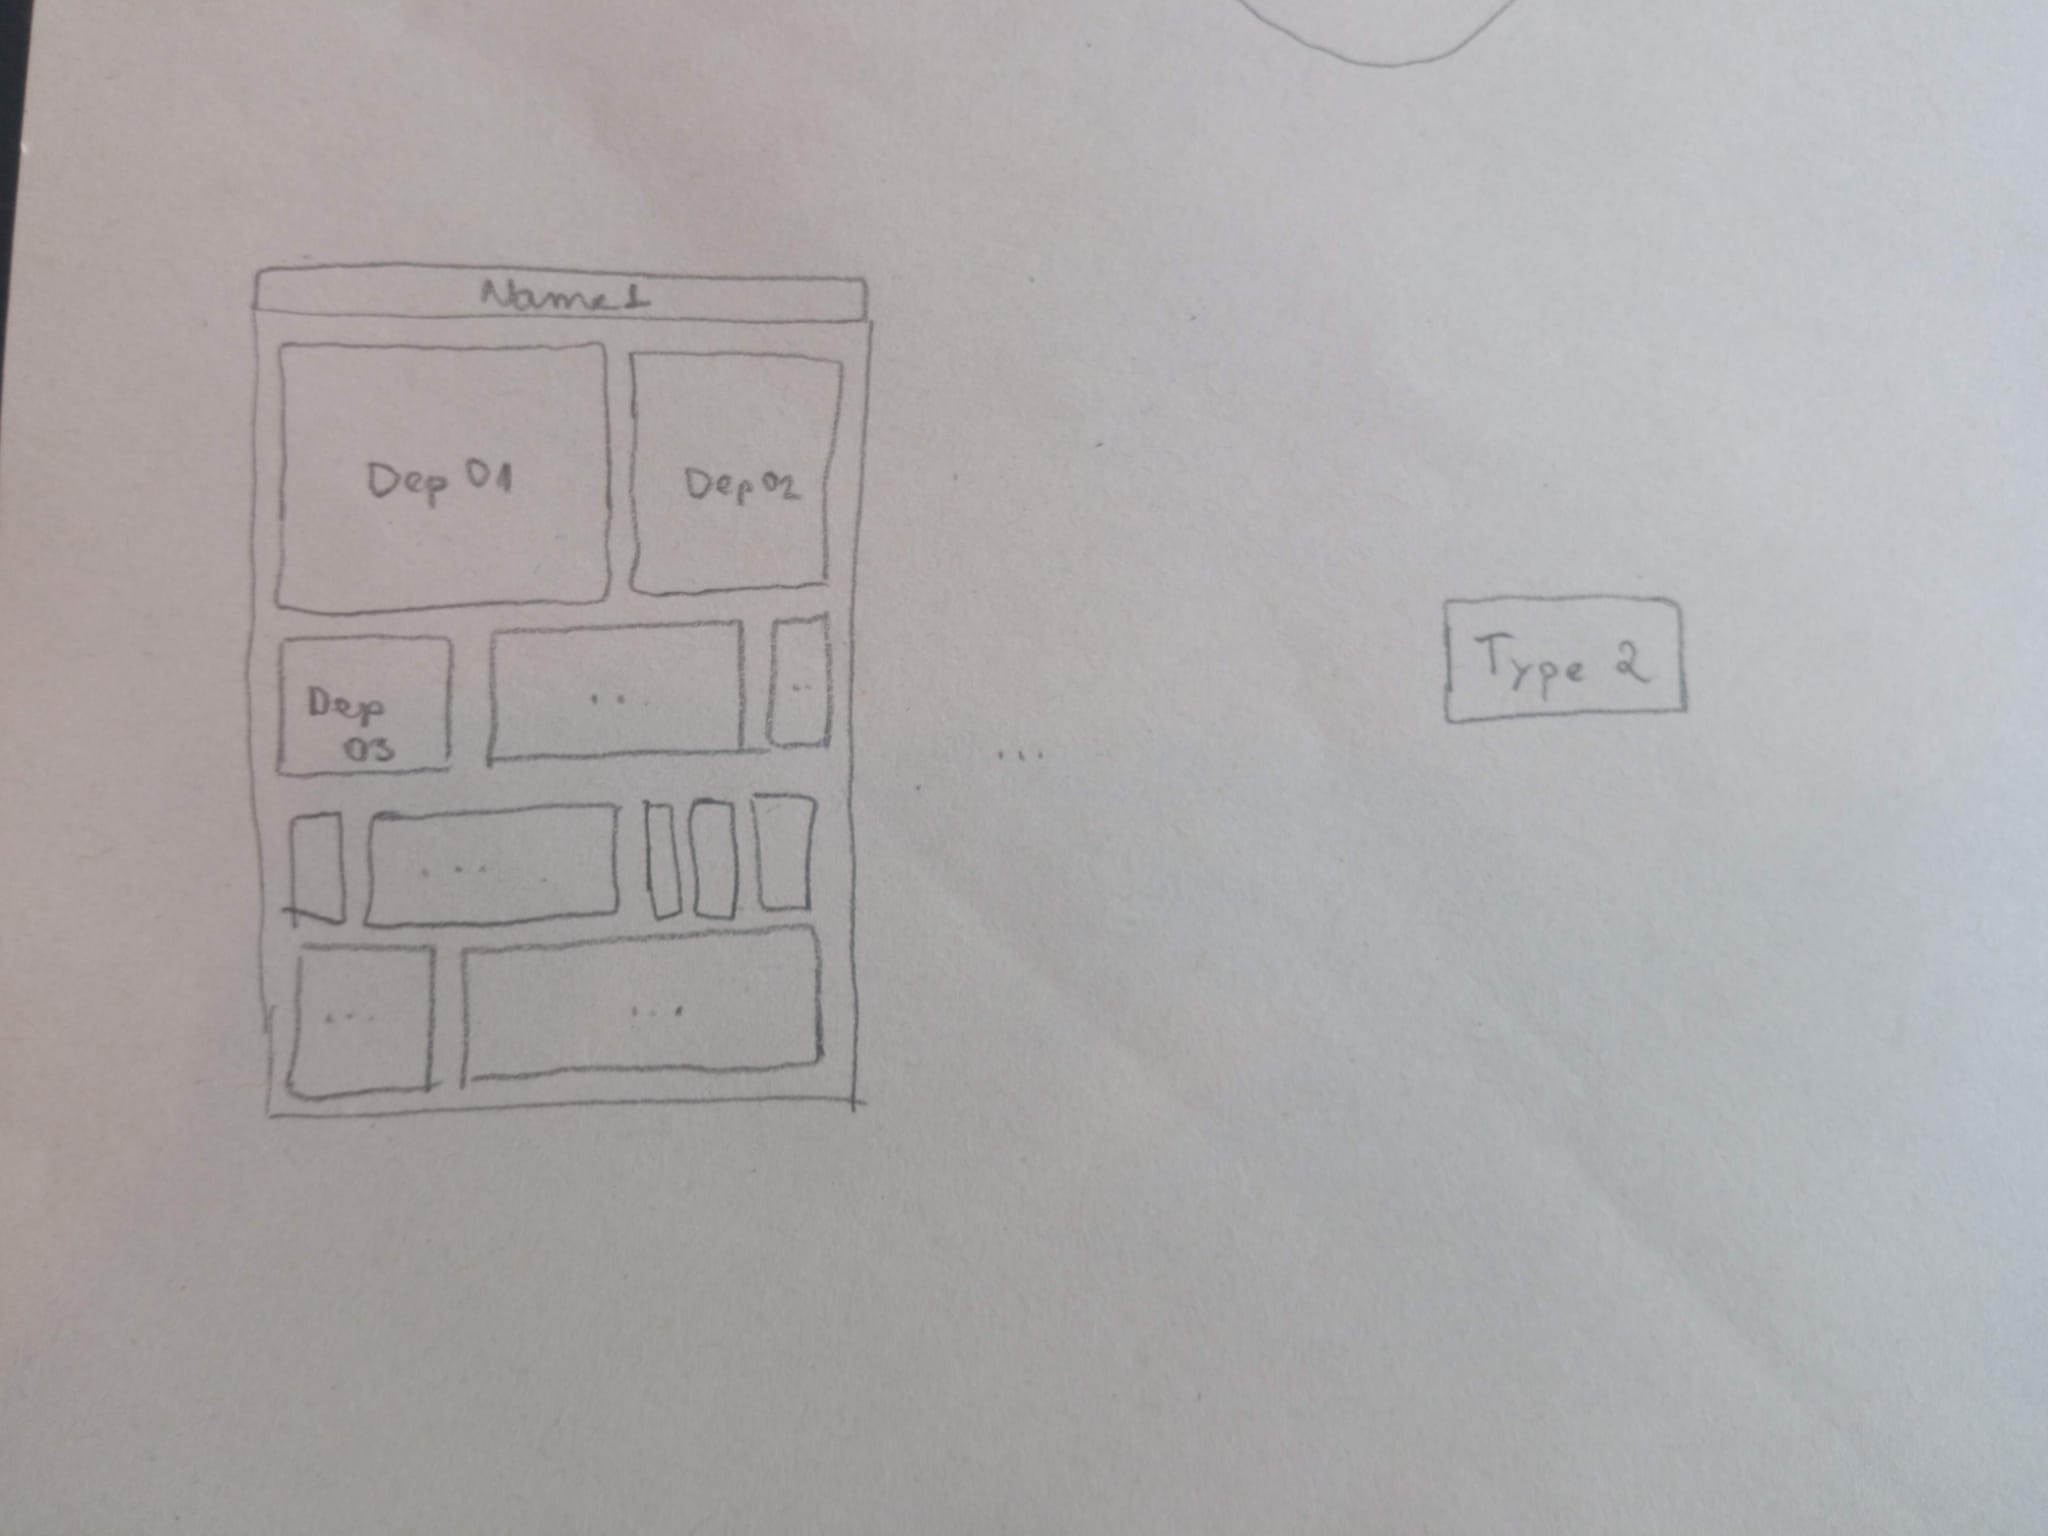

In [15]:
Image(filename=path +"./images/vizu2.1.jpg")

For this vizualization we have the **treemap**, here we can see that:

Positive Points:
* Hierarchical Representation: The treemap allows you to represent hierarchical data effectively. Each tree map corresponds to a specific name, and the nested rectangles within the tree map display the amount of babies with that name in each department. This hierarchical structure provides a clear visual representation of the data's organization.

* Size Comparison: The size of each rectangle in the treemap represents the relative quantity of babies with a particular name in each department. This allows for easy comparison between names and departments. Larger rectangles indicate a higher number of babies with a specific name, while smaller rectangles represent a lower count.

* Color Coding: You can utilize color coding within the treemap to further enhance the visualization. By assigning different colors to different names or by using a gradient to represent varying quantities, you can make it easier for viewers to interpret the data.

* Clear Department-wise Distribution: The treemap's structure allows for a clear visualization of how the number of babies with a particular name is distributed across various departments. It provides a quick overview of which departments have a higher or lower prevalence of a given name.

For week points:
* Limited Name Comparison: While the treemap effectively represents the data hierarchy, it may not be ideal for directly comparing names against each other. The hierarchical structure can make it challenging to visually compare the number of babies with different names. In such cases, a different visualization, like a bar chart or a line graph, may be more suitable.

* Difficulty in Identifying Specific Numbers: While the treemap can show relative quantities through size comparison, it may be challenging to determine exact values. The precise number of babies with a specific name in each department might not be immediately apparent from the visualization alone, requiring additional effort from the viewer to extract precise information.

* Limited Space for Labeling: Depending on the complexity of the data and the number of names and departments, the treemap visualization may not provide enough space for labeling each rectangle with the name and count. This could potentially result in overcrowding or the need for truncated labels, which can reduce clarity and readability.

* Potential Information Overload: If the dataset contains a large number of names or departments, the treemap might become overcrowded and visually overwhelming. This can make it challenging for viewers to interpret and comprehend the information presented, particularly if the labels are not easily readable.

#### Implementation

In [11]:
import pandas as pd
import plotly.express as px

df_cleaned = baby_names.dropna(subset=['preusuel'])
selected_rows = df_cleaned[df_cleaned['preusuel'].str.contains('BRUNO')]
department_counts = selected_rows.groupby('dpt')['nombre'].sum().reset_index()

# Create a treemap using plotly
fig = px.treemap(department_counts, path=['dpt'], values='nombre')
fig.update_layout(title='Occurrences of Bruno by Department')
# Display the treemap
fig.show()

One drawback of this representation is the difficulty in comparing names easily with each other. However, we can still infer some information from the chart. For example, we can observe that the name is more commonly found in departments 75, 59, 62, 78, and 76. As we move away from these departments, the occurrence of the name decreases. Consequently, we can conclude that the name is not common in every department.

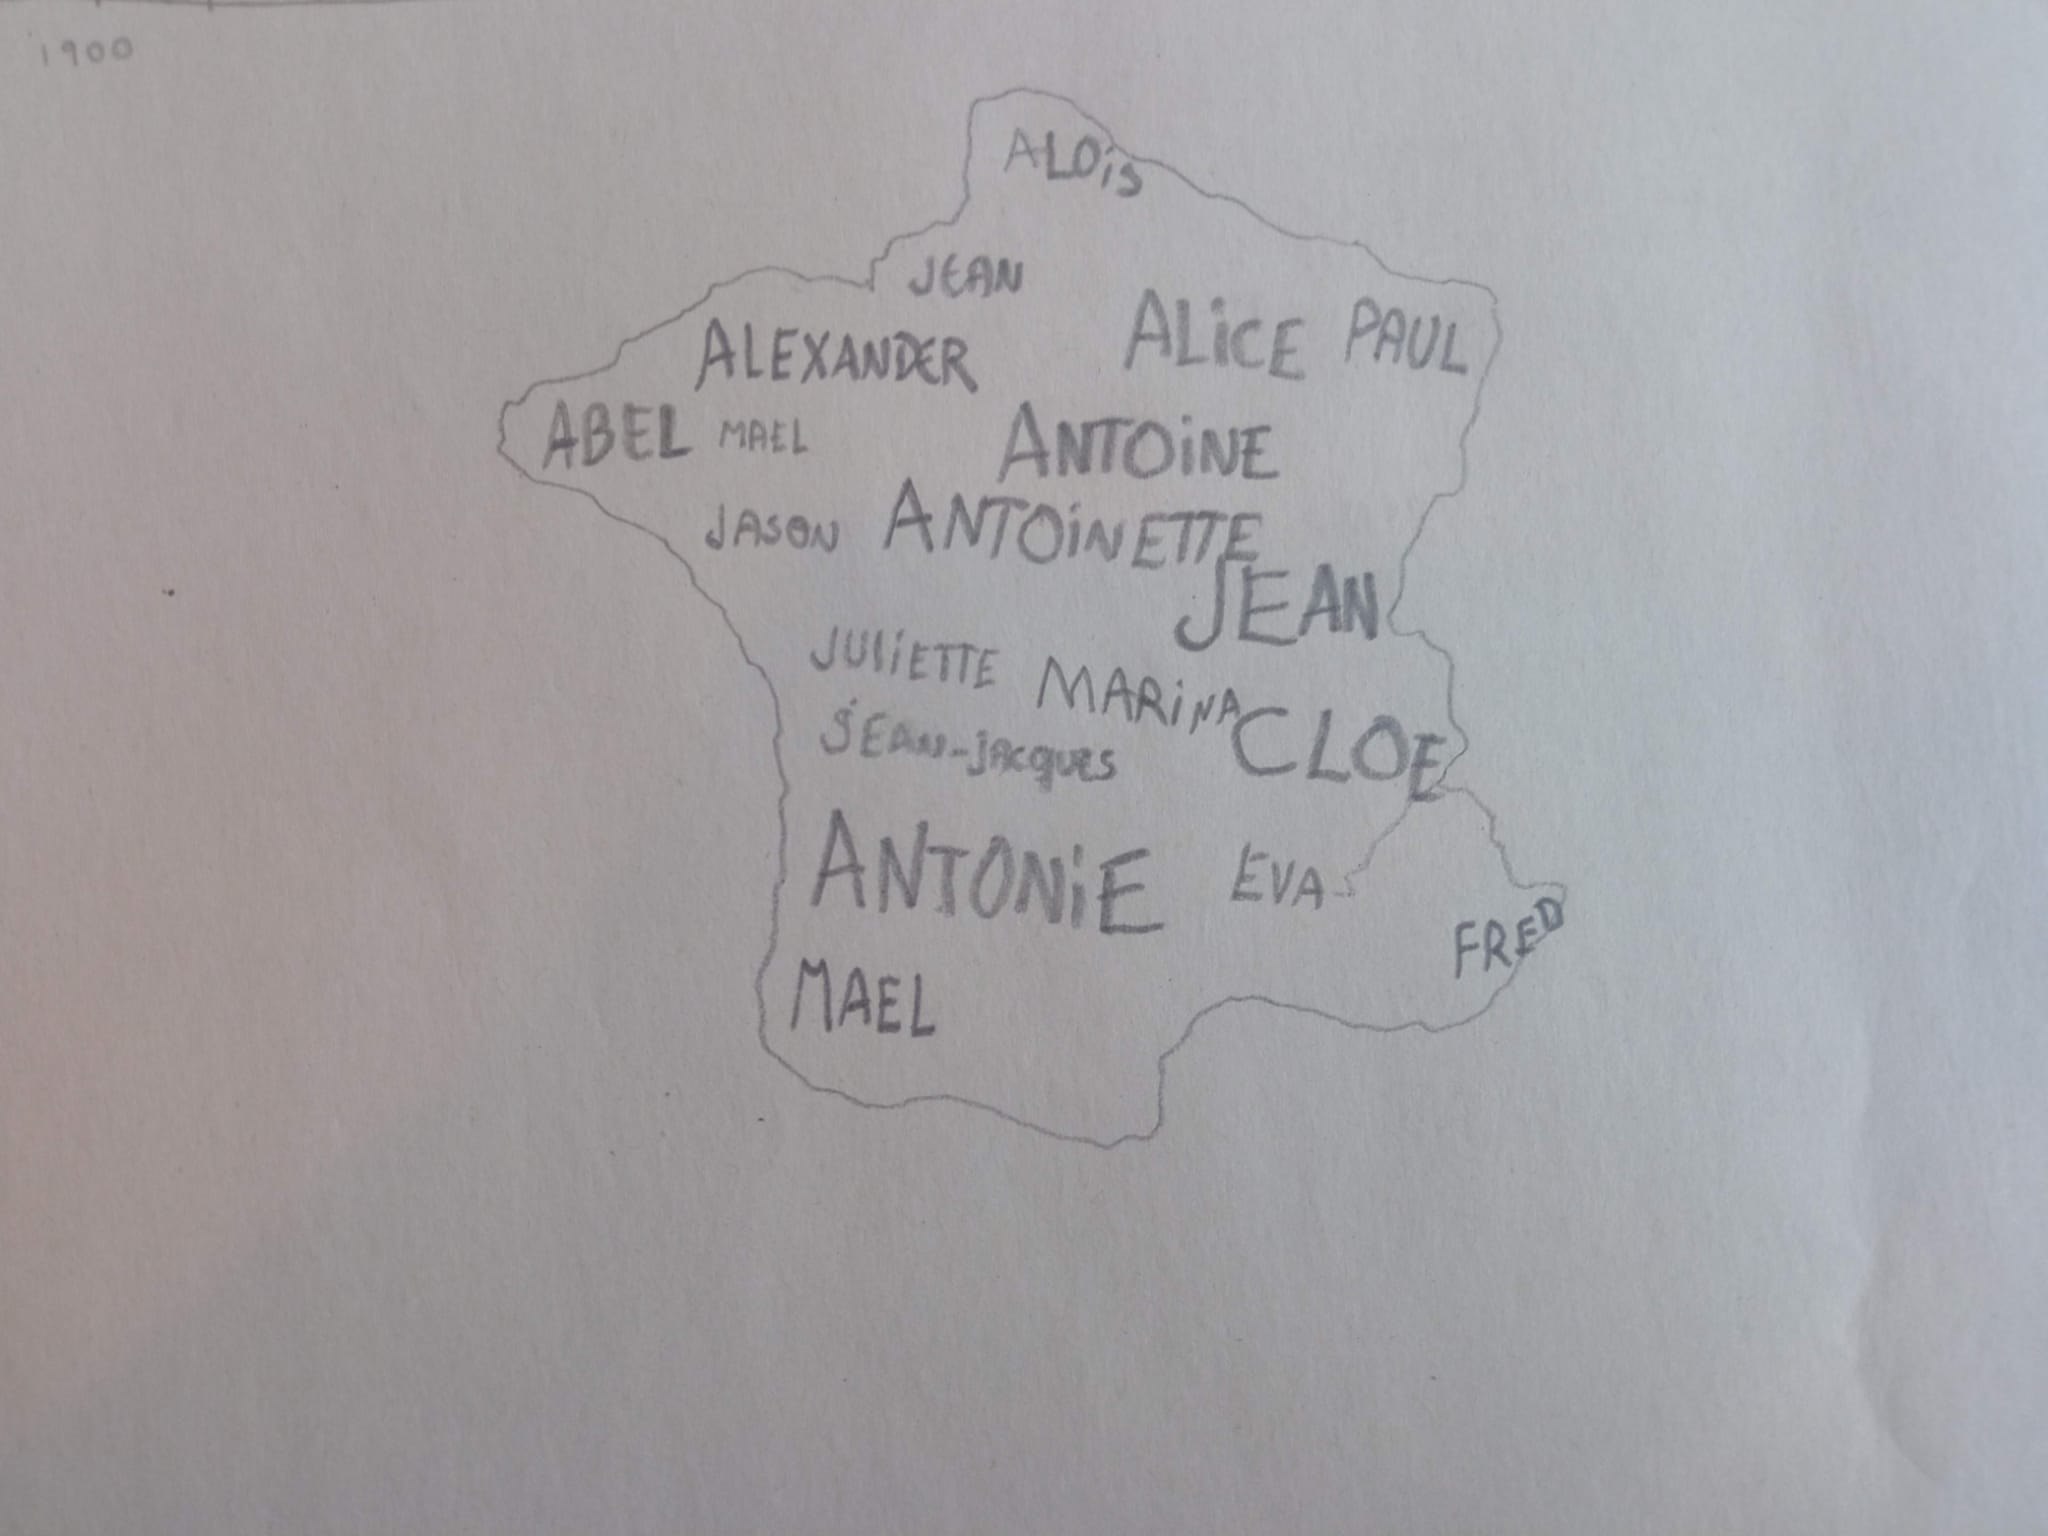

In [17]:
Image(filename=path +"./images/vizu2.2.jpg")

Now we draw a **map of France with the most important names of every region** written on it:

Positive Points:
1. Geographical Context: By representing the names directly on the map of France, the chart provides a clear geographical context. Viewers can easily identify the regions associated with each name, which can be helpful in understanding the regional distribution of names.

2. Localization of Names: The chart allows for the localization of names within specific regions. This can be useful for identifying popular or distinctive names associated with particular areas of France, providing insights into regional naming trends.

3. Visual Appeal: A map-based chart can have aesthetic appeal, as it combines the visual representation of geographic boundaries with textual information (names). This can make the chart visually engaging and captivating for viewers.

4. Spatial Comparison: The chart enables viewers to compare the occurrence of names across different regions of France. By visually inspecting the density or presence of names in various areas, viewers can gain a sense of the relative popularity or prevalence of names within the country.

Negatives Points:
1. Overcrowding: Depending on the number of names and regions, the chart may become crowded and cluttered. If there are many names to display, especially in densely populated regions, it could lead to overlapping or illegible text, making it difficult to discern individual names.

2. Uneven Data Distribution: If the data is unevenly distributed across regions, the chart may exhibit variations in the density of names. Some regions may have a large number of names, while others may have very few or none at all. This can lead to imbalanced visual representation, potentially skewing the perception of naming patterns.


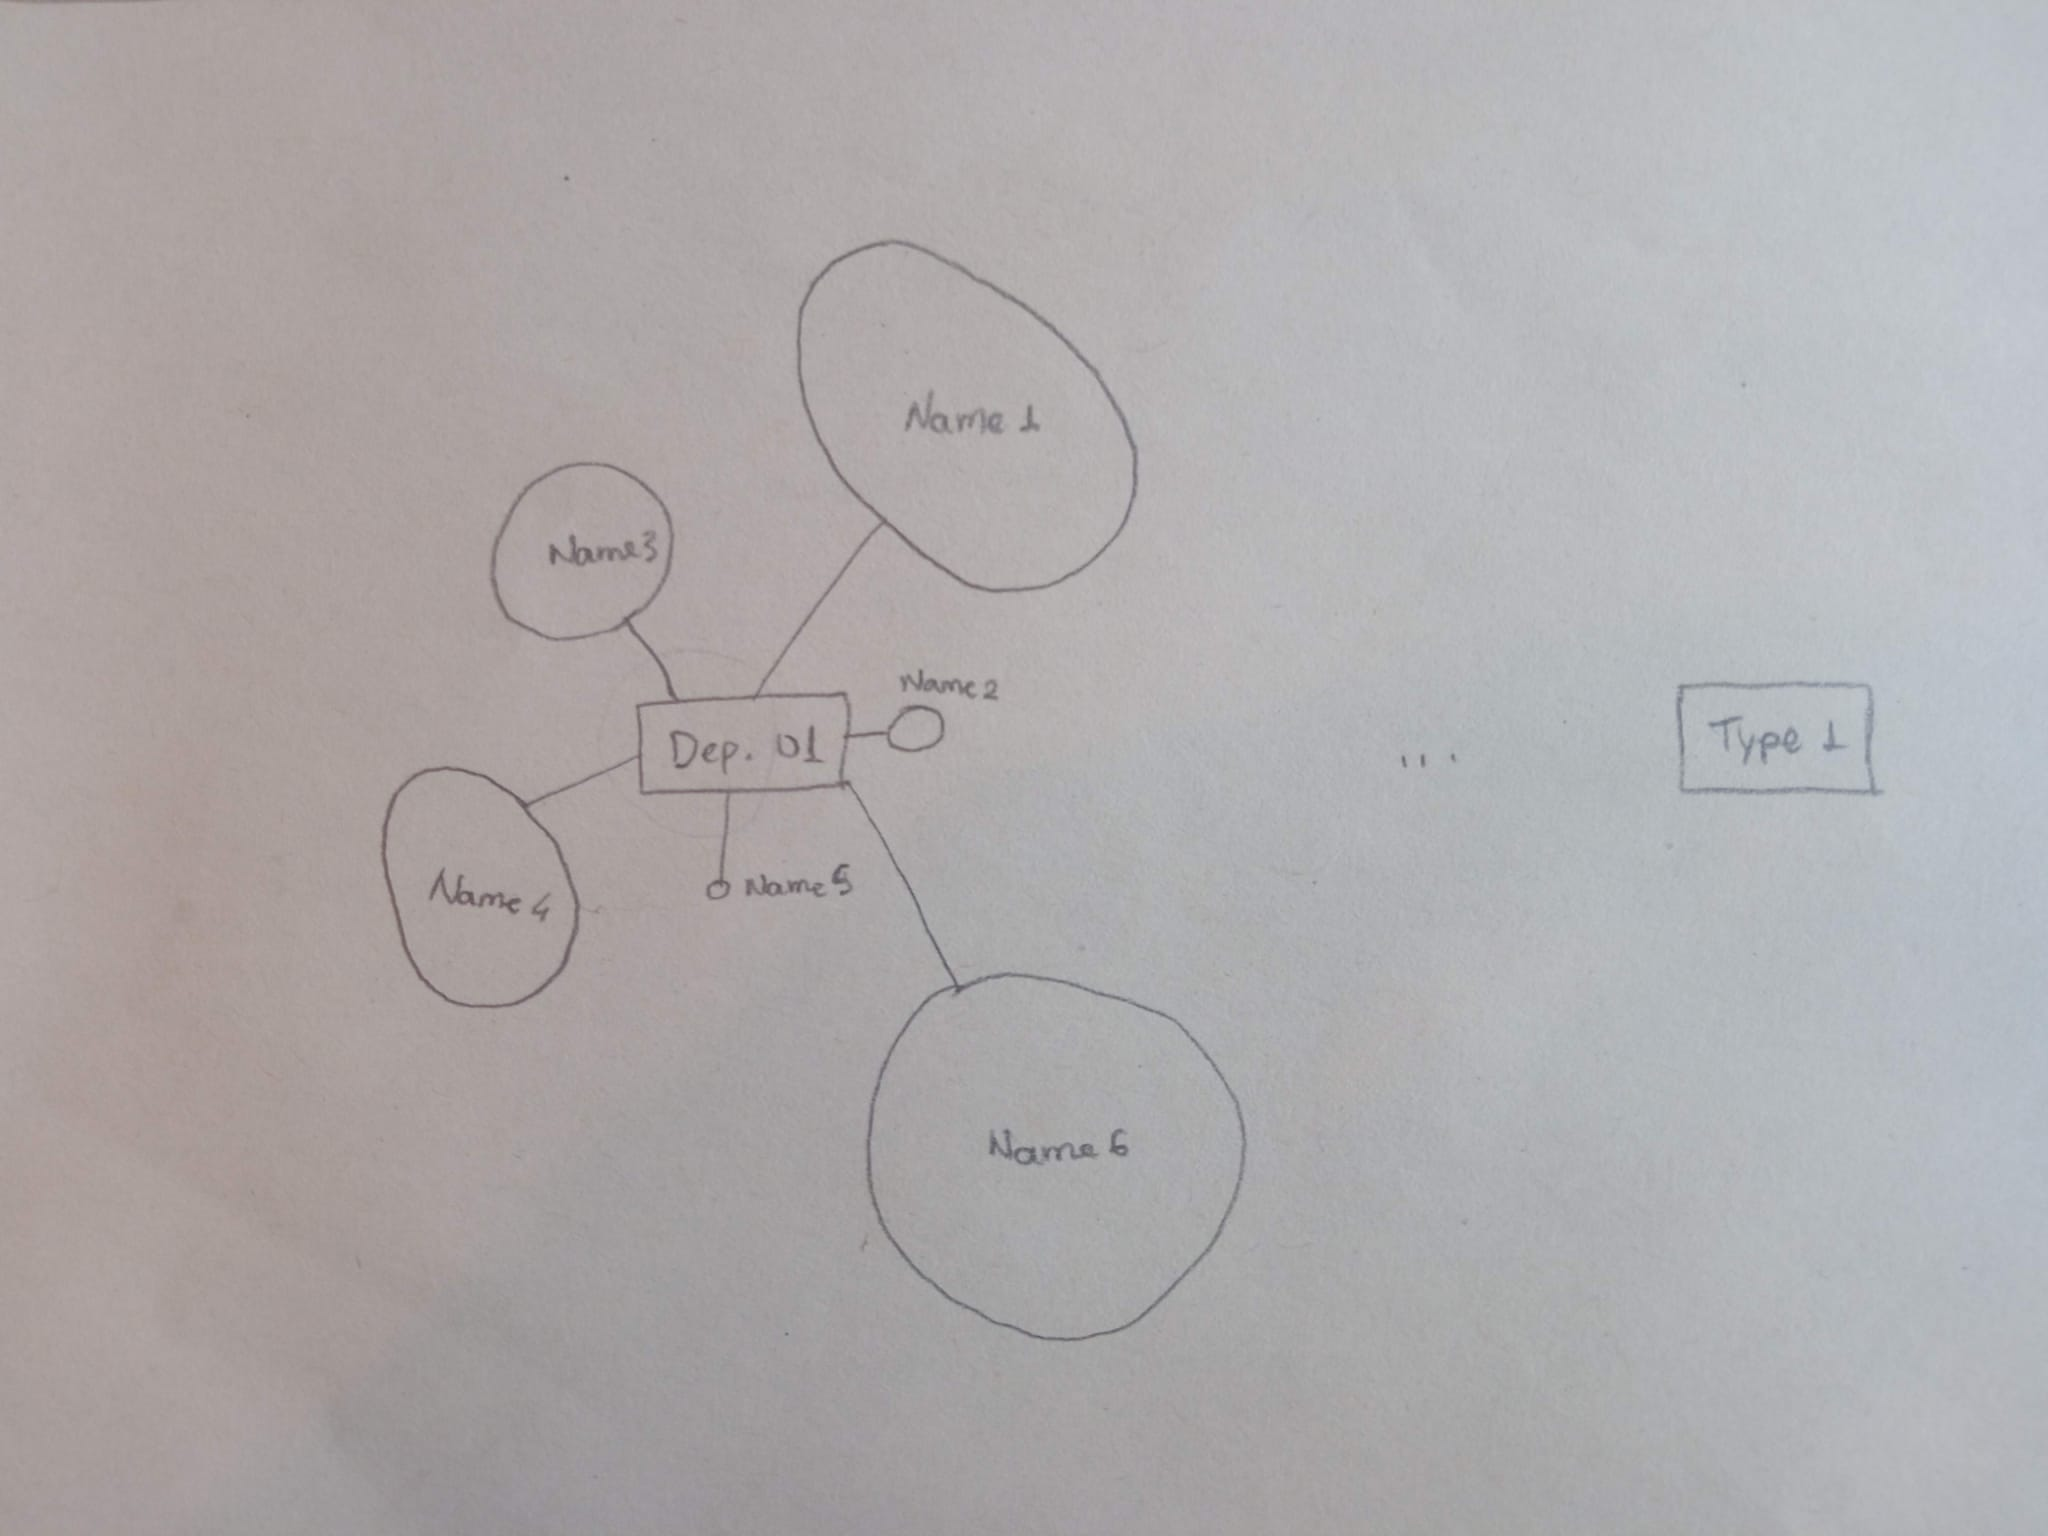

In [18]:
Image(filename=path +"./images/vizu2.3.jpg")

### Visualization 3

Are there gender effects in the data? Does popularity of names given to both sexes evolve consistently?

#### Sketches

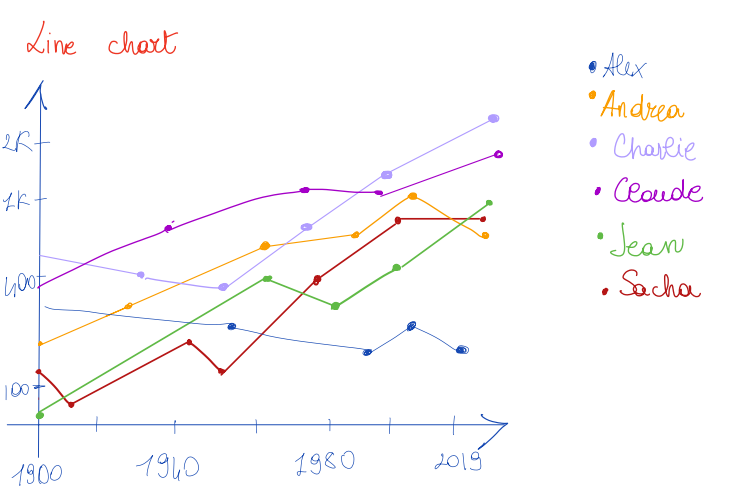

In [19]:
Image(filename=path +"./images/LineChart.png")

The **line chart** visualization displays the evolution of gender-neutral names over time. Each gender-neutral name is represented by a line on the chart, where the x-axis represents the years and the y-axis represents the popularity/quantity of the name. This visualization allows us to observe how the popularity of gender-neutral names has changed over the years and whether there are any consistent trends or fluctuations.

The strengths of this visualization include:
- Visualizing the temporal trends of gender-neutral names, providing insights into their popularity patterns.
- Comparing the popularity of different gender-neutral names over time, allowing for identification of common and uncommon names.
- Tracking changes in the popularity of gender-neutral names across different time periods.

However, there are some potential limitations to consider:
- The visual representation of multiple lines may become crowded, especially when there are a large number of gender-neutral names.
- It may be challenging to discern specific details for individual names when many lines overlap. Filtering or highlighting specific names or subsets of names can help address this issue.

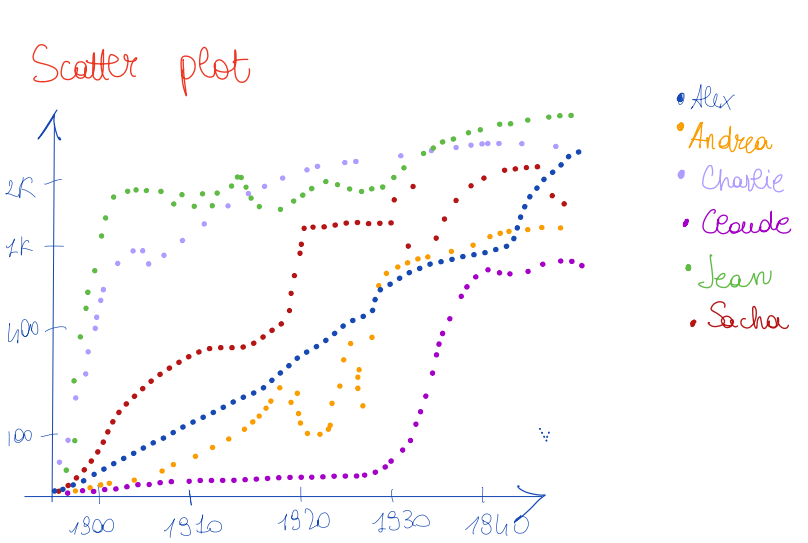

In [20]:
Image(filename=path +"./images/Scatter Plot.png")

The **scatter plot** visualization is an effective way to showcase the evolution and distribution of names over time. Each point on the graph represents a specific name in a given year, with the x-axis representing the years and the y-axis representing the popularity/quantity. This type of chart can highlight any clusters of similar names or fluctuations in popularity over time.

The strengths of this visualization include:
- Visualizing the individual trajectories of names over time, allowing for the observation of popularity fluctuations and patterns.
- Identifying clusters or groups of names that share similar popularity trends.
- Providing a comprehensive view of the overall distribution and dispersion of names over the years.

However, there are some considerations to keep in mind:
- With a large number of names, the scatter plot can become crowded, potentially making it challenging to discern individual points or patterns.
- Careful labeling and color-coding of the points can enhance the readability and interpretability of the chart.

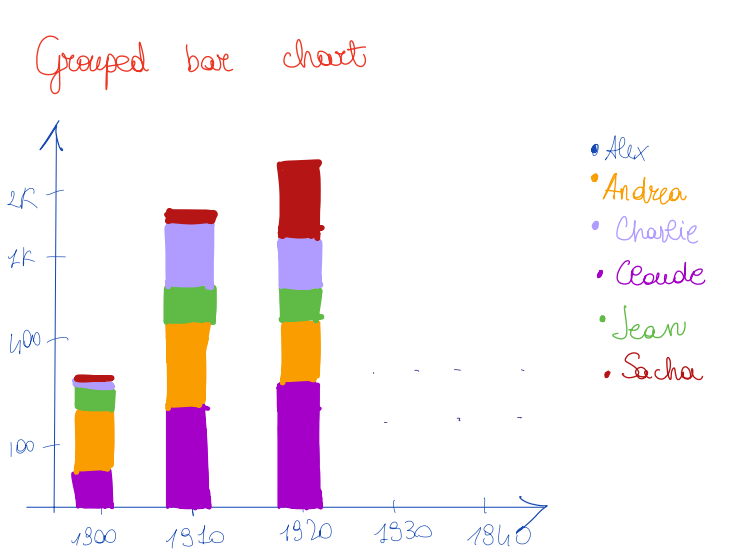

In [21]:
Image(filename=path +"./images/Grouped bar Chart.png")

The **grouped bar chart** visualization offers a comparative view of the evolution of different names over time. Each bar represents a specific year (we chose to represent a bar each 10 years), and the bars are grouped by name. The height of each bar indicates the popularity of the corresponding name in that particular year. This type of chart enables a direct visual comparison of the trends and popularity of names. With the y-axis, we can discern the total count of neutral names given in a specific year.

The strengths of this visualization include:
- Facilitating a straightforward visual comparison of the popularity trends of different names over time.
- Providing a clear representation of the relative popularity of names in each year.
- Allowing for the identification of names that consistently maintain popularity or experience fluctuations over time.

However, there are some considerations to keep in mind:
- As the number of names increases, the bars may become too high/tall.

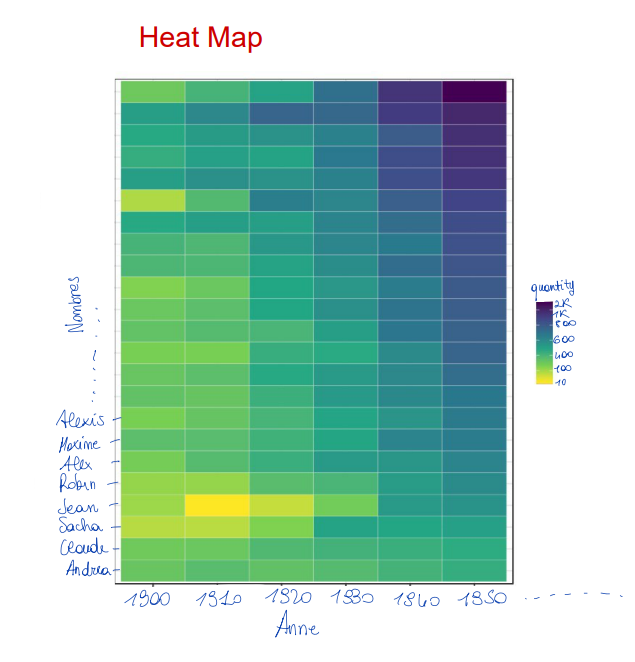

In [22]:
Image(filename=path +"./images/Heat Map.png")

The **heatmap** visualization utilizes a heatmap chart to showcase the evolution of baby neutral-names over time. The x-axis represents the years, while the y-axis consists of discrete intervals representing each name. The varying colors on the heatmap indicate the popularity of the name.

The strengths of this visualization include:
- Providing a comprehensive view of the popularity of names over time, allowing for easy identification of trends and patterns.
- Enabling the comparison of popularity across different names and years, highlighting the most popular and less popular names.
- Offering a visually appealing representation that allows for quick insights into the distribution and changes in popularity.

However, there are some considerations to keep in mind:
- With a large number of names, the heatmap may become too big.
- When the quantity does not vary significantly, it becomes challenging to distinguish between different quantities.
- Careful sorting and labeling of the names can improve the readability and interpretability of the heatmap.


#### Implementation

In [86]:
import plotly.graph_objects as go

df_cleaned = baby_names.dropna(subset=['preusuel'])
name_year_counts = df_cleaned.groupby(['preusuel', 'annais'])['nombre'].sum().reset_index()

# Exclude names with preusuel = "_PRENOMS_RARES"
name_year_counts = name_year_counts[name_year_counts['preusuel'] != "_PRENOMS_RARES"]

# Filter for names for both sexes
name_counts = df_cleaned.groupby('preusuel')['sexe'].unique().reset_index()
filtered_names = name_counts[name_counts['sexe'].apply(lambda x: set(x) == {1, 2})]['preusuel']

# Sort by 'annais' (because if not the heatmap goes from 1962 to 2020 and then from 1904 to 1984)
name_year_counts_filtered = name_year_counts_filtered.sort_values('annais')


# Calculate the minimum and maximum popularity to set che colorscale
min_popularity = name_year_counts['nombre'].min()
max_popularity = name_year_counts['nombre'].max()

print("Minimum Popularity:", min_popularity)
print("Maximum Popularity:", max_popularity)

Minimum Popularity: 3
Maximum Popularity: 53596


In [95]:

# Filter data for the year 2021
data_2021 = name_year_counts_filtered.loc[name_year_counts_filtered['annais'] == 2022]
data_2021


,preusuel,annais,nombre


In [124]:
import plotly.graph_objects as go
import numpy as np

# Define the logarithmic range of values
zmin = 3
zmax = 50000
z_range = np.logspace(np.log10(zmin), np.log10(zmax), len(colorscales)-1)

colorscales = [
    [0.0, "rgb(68, 1, 84)"],
    [0.03, "rgb(72, 35, 116)"],
    [0.07, "rgb(64, 86, 135)"],
    [0.1, "rgb(52, 132, 144)"],
    [0.13, "rgb(94, 181, 122)"],
    [0.17, "rgb(140, 208, 95)"],
    [0.2, "rgb(179, 226, 70)"],
    [0.23, "rgb(217, 240, 52)"],
    [0.27, "rgb(253, 231, 37)"],
    [0.3, "rgb(238, 160, 30)"],
    [1.0, "rgb(215, 25, 28)"]
]

# Create the heatmap chart using plotly
fig = go.Figure(data=go.Heatmap(
    x=name_year_counts_filtered['annais'],
    y=name_year_counts_filtered['preusuel'],
    z=name_year_counts_filtered['nombre'],
    colorscale=colorscales,
    zmin=zmin,
    zmax=zmax,
))

# Customize the layout of the heatmap
fig.update_layout(
    title='Popularity of Baby Neutral-Names Over Time',
    xaxis_title='Year',
    yaxis_title='Names',
)

# Update the hover label formatting
fig.update_traces(hovertemplate='Year: %{x}<br>'+
                                  'Names: %{y}<br>'+
                                  'Popularity: %{z}')

# Add colorbar
fig.update_layout(coloraxis_colorbar=dict(
    title='Popularity',
    titleside='right',
    tickmode='array',
    tickvals=z_range,
    ticktext=[f'{int(val)}' if val >= 1000 else f'{int(val):.0f}' for val in z_range]
))

# Display the heatmap
fig.show()



- With the hover, when there is no name in a given year, the heatmap does not display any color or z data. However, it is important to note that in these cases, the popularity of the name is actually 0. Unfortunately, I was unable to find a solution to display the value 0 in the hover label when there is no corresponding data for a specific name and year.

- In an attempt to address the issue of color gradient, I made modifications to the colorscale used in the heatmap. Previously, the colorscale was dominated by shades of purple, making it difficult to distinguish variations in popularity for names with counts less then 10,000. To enhance the visual representation, I expanded the colorscale to include a wider range of colors for counts up to 15,000, and reduced the number of colors used for counts above that threshold.

- To navigate the heatmap effectively, it is recommended to zoom in and out of the chart. This allows for a better view and legibility of all the names displayed. By adjusting the zoom level, users can explore the heatmap in detail and observe the changing popularity of names over time.

- It is worth noting that the year 2021 may appear unusual in the heatmap. This is because, upon hovering, it does not display the names or corresponding popularity data as expected. Additionally, there are numerous names that appear for the first time in this  year. Further exploration and analysis may be required to fully understand the patterns observed in the year 2021.


### Comments

We choose to implement the heatmap because this visualization effectively showcases the evolution of baby neutral-names over time.
Compared to other visualizations, such as line charts or bar graphs, the heatmap has distinct advantages. It excels in showcasing the complete picture without overlapping lines, ensuring that each name's popularity is clearly visible and discernible. By utilizing varying colors, the heatmap not only presents the popularity of each name but also enables easy identification and understanding of the trends. This makes it an ideal choice for analyzing the evolution of baby neutral-names, as it provides a comprehensive and visually appealing representation of the data.
Anyway, it's important to consider factors such as the size limitations of the visualization with a large number of names and challenges in distinguishing between subtle variations in quantity.

In analyzing the data, it is evident that there are gender effects and trends in the popularity of names given to both sexes. Over time, there has been a significant increase of giving neutral names to children. This trend is particularly pronounced in the last period, where we observe a consistent and linear growth in the popularity of neutral names, especially after the **year 1950** (more or less).

This increase in the use of neutral names can be attributed to several factors. Firstly, the progress in LGBT+ rights and the increasing acceptance and recognition of diverse gender identities have influenced the naming practices. Additionally, the empowerment of women and the blurring of traditional gender roles have also contributed to the rise of neutral names. As societal norms evolve and the distinctions between genders become less rigid, there is a growing tendency to choose names that are not strictly associated with a specific gender.
So, the data supports the notion that the popularity of neutral names has been evolving consistently, with a notable surge in recent years. This trend reflects the broader societal changes towards inclusivity and the recognition of diverse gender expressions.